# Error detection rules included in traval

This notebook shows simple examples of the error detection rules in `traval`.

In [1]:
import numpy as np
import pandas as pd

import traval
from traval import rulelib as rlib

Create a very simple time series:

In [35]:
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
s1

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int64

## `rule_ufunc_threshold`: float threshold

Rule comparing series to threshold value.

In [2]:
c1 = rlib.rule_ufunc_threshold(s1, (np.greater_equal,), 5)
assert (c1["correction_code"] == 2).sum() == 5
c1

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,2,5.0,5.0
2020-01-07,2,6.0,5.0
2020-01-08,2,7.0,5.0
2020-01-09,2,8.0,5.0
2020-01-10,2,9.0,5.0


## `rule_ufunc_threshold`: threshold series

Rule comparing series to threshold series.

In [3]:
# rule_ufunc_threshold: series
idx = date_range[:3].to_list() + date_range[-4:-1].to_list()
thresh_series = pd.Series(index=idx, data=5.0)
full_threshold_series = traval.ts_utils.resample_short_series_to_long_series(
    thresh_series, s1
)
c2 = rlib.rule_ufunc_threshold(s1, (np.greater_equal,), thresh_series)
assert (c2["correction_code"] == 2).sum() == 5
c2

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,2,5.0,5.0
2020-01-07,2,6.0,5.0
2020-01-08,2,7.0,5.0
2020-01-09,2,8.0,5.0
2020-01-10,2,9.0,5.0


## `rule_diff_ufunc_threshold`

Rule comparing diff of series to threshold value.

In [4]:
# rule_diff_ufunc_threshold
s1.loc[date_range[4]] += 1
c3 = rlib.rule_diff_ufunc_threshold(s1, (np.greater_equal,), 1.1)
assert (c3["correction_code"] == 2).sum() == 1
c3

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,2,5.0,1.1
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,0,NaN,NaN
2020-01-10,0,NaN,NaN


## `rule_other_ufunc_threshold`

Rule comparing other series to threshold.

In [5]:
# rule_other_ufunc_threshold
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
val = s1.copy()
c4 = rlib.rule_other_ufunc_threshold(s1, val, (np.less,), 5)
assert (c4["correction_code"] == -2).sum() == 5
c4

,correction_code,series_values,comparison_values
2020-01-01,-2,0.0,5.0
2020-01-02,-2,1.0,5.0
2020-01-03,-2,2.0,5.0
2020-01-04,-2,3.0,5.0
2020-01-05,-2,4.0,5.0
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,0,NaN,NaN
2020-01-10,0,NaN,NaN


## `rule_max_gradient`

Rule that checks the maximum gradient between two values.

In [6]:
# rule_max_gradient
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
s1.loc[date_range[4]] += 1
c5 = rlib.rule_max_gradient(s1, max_step=1.0, max_timestep="1D")
assert (c5["correction_code"] == 2).sum() == 1
c5

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,2,5.0,1.0
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,0,NaN,NaN
2020-01-10,0,NaN,NaN


## `rule_spike_detection`

Rule that detects spikes, single observations that differ significantly from both
neighbors.

In [7]:
# rule_spike_detection
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
s1.iloc[4] += 3
c6 = rlib.rule_spike_detection(s1, threshold=2, spike_tol=2)
assert (c6["correction_code"] == 99).sum() == 1
c6

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,99,7.0,NaN
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,0,NaN,NaN
2020-01-10,0,NaN,NaN


## `rule_offset_detection`

Rule that looks for periods that are offset relative to the rest of the time series.

In [8]:
# rule_offset_detection
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
s1.iloc[3:7] += 10
c7 = rlib.rule_offset_detection(s1, threshold=5, updown_diff=2.0)
assert (c7["correction_code"] == 99).sum() == 4
c7

,correction_code,series_values,comparison_values
2020-01-01,0.0,NaN,NaN
2020-01-02,0.0,NaN,NaN
2020-01-03,0.0,NaN,NaN
2020-01-04,99.0,NaN,NaN
2020-01-05,99.0,NaN,NaN
2020-01-06,99.0,NaN,NaN
2020-01-07,99.0,NaN,NaN
2020-01-08,0.0,NaN,NaN
2020-01-09,0.0,NaN,NaN
2020-01-10,0.0,NaN,NaN


## `rule_outside_n_sigma`

Rule that checks if measurements are outside $N$ standard deviations of the time series.

In [9]:
# rule_outside_n_sigma
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
c8 = rlib.rule_outside_n_sigma(s1, n=1.0)
assert (c8["correction_code"] == -2).sum() == 2
assert (c8["correction_code"] == 2).sum() == 2
c8

,correction_code,series_values,comparison_values
2020-01-01,-2,0.0,1.47235
2020-01-02,-2,1.0,1.47235
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,2,8.0,7.52765
2020-01-10,2,9.0,7.52765


## `rule_diff_outside_of_n_sigma`

Rule that checks if the diff of a series lies outside of $N$ standard deviations of the
differences.

In [10]:
# rule_diff_outside_of_n_sigma
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
s1.iloc[5:] += np.arange(5)
c9 = rlib.rule_diff_outside_of_n_sigma(s1, 2.0)
assert (c9["correction_code"] == 2).sum() == 4
c9

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,0,NaN,NaN
2020-01-07,2,2.0,1.054093
2020-01-08,2,2.0,1.054093
2020-01-09,2,2.0,1.054093
2020-01-10,2,2.0,1.054093


## `rule_outside_bandwidth`

Rule checking values lie outside some given upper and lower thresholds.

In [11]:
# rule_outside_bandwidth
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
lb = pd.Series(index=date_range[[0, -1]], data=[1, 2])
ub = pd.Series(index=date_range[[0, -1]], data=[7, 8])
c10 = rlib.rule_outside_bandwidth(s1, lb, ub)
assert (c10["correction_code"] == -2).sum() == 2
assert (c10["correction_code"] == 2).sum() == 2
c10

,correction_code,series_values,comparison_values
2020-01-01,-2,0.0,1.000000
2020-01-02,-2,1.0,1.111111
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,2,8.0,7.888889
2020-01-10,2,9.0,8.000000


## `rule_shift_to_manual_obs`

Rule that corrects observations and shifts them to manual observations using linear
interpolation of the differences between the time series and the manual observations.

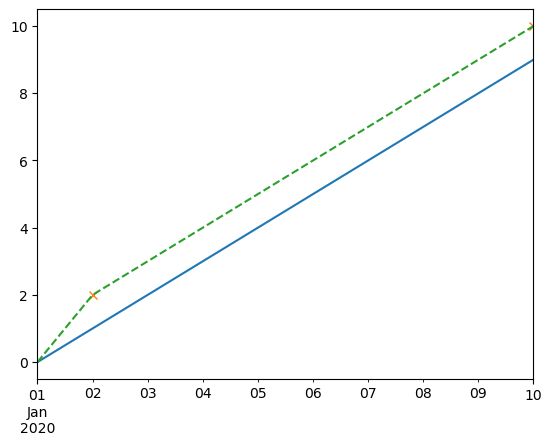

In [36]:
# rule_shift_to_manual_obs
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
h = pd.Series(index=date_range[[1, -1]], data=[2, 10])
a = rlib.rule_shift_to_manual_obs(s1, h, max_dt="2D", method="linear")
assert (a.iloc[1:] == s1.iloc[1:] + 1).all()
assert a.iloc[0] == s1.iloc[0]
ax = s1.plot()
h.plot(ax=ax, marker="x", ls="none")
a.plot(ax=ax, ls="dashed");

## `rule_compare_to_manual_obs`

Rule that compares a time series to manual observations. Values are marked as suspect
when the linear interpolated difference between the time series and the manual
observations exceeds some threshold.

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,-2,-1.250,-1.0
2020-01-09,-2,-1.625,-1.0
2020-01-10,-2,-2.000,-1.0


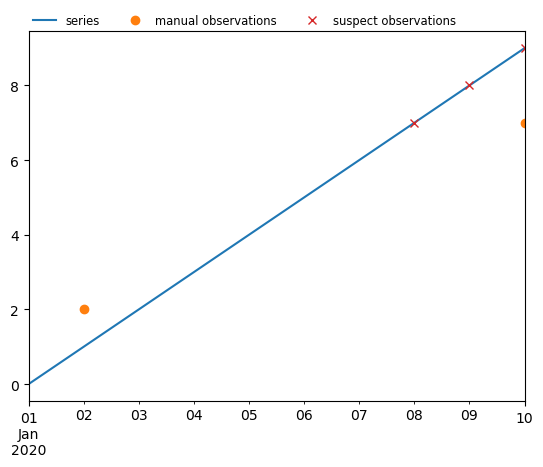

In [39]:
# rule compare_to_manual_obs
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
h = pd.Series(index=date_range[[1, -1]], data=[2, 7])
c11 = rlib.rule_compare_to_manual_obs(
    s1, h, threshold=1.0, max_dt="2D", method="linear"
)
ax = s1.plot(label="series")
h.plot(ax=ax, marker="o", ls="none", label="manual observations")
s1.loc[c11["correction_code"] != 0].plot(
    ax=ax, marker="x", ls="none", label="suspect observations", c="C3"
)
ax.legend(loc=(0, 1), frameon=False, ncol=3, fontsize="small")
c11

## `rule_combine_corrections_or`

Rule for combining results of any number of other rules. Observations are suspect if
ANY rule flags an observation as suspect.

In [42]:
# rule_combine_corrections_or
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.DataFrame(index=date_range, columns=["correction_code"], data=0)
s2 = s1.copy()
s1.iloc[0] = 99
s2.iloc[-1] = -2
c11 = rlib.rule_combine_corrections_or(s1, s2)
assert (c11["correction_code"] == 99).sum() == 2
c11

,correction_code,series_values,comparison_values
2020-01-01,99,NaN,NaN
2020-01-02,0,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,0,NaN,NaN
2020-01-10,99,NaN,NaN


## `rule_combine_corrections_and`

Rule for combining results of any number of other rules. Observations are suspect if
ALL rules flag an observation as suspect.

In [55]:
# rule_combine_corrections_and
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.DataFrame(index=date_range, columns=["correction_code"], data=0)
s2 = s1.copy()
s1.iloc[0:2] = 99
s2.iloc[1:3] = -2
c12 = rlib.rule_combine_corrections_and(s1, s2)
assert (c12["correction_code"] == 99).sum() == 1
c12

,correction_code,series_values,comparison_values
2020-01-01,0,NaN,NaN
2020-01-02,99,NaN,NaN
2020-01-03,0,NaN,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,0,NaN,NaN
2020-01-10,0,NaN,NaN


## `rule_funcdict`

Rule that takes a dictionary of functions and applies those iteratively to the original
time series. Observations are suspect if any rule flags an observation as suspect.

In [24]:
# rule_funcdict_to_nan
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
s1 = pd.Series(index=date_range, data=np.arange(10))
fdict = {"lt_3": lambda s: s < 3.0, "gt_7": lambda s: s > 7.0}
c13 = rlib.rule_funcdict(s1, fdict)
assert (c13["correction_code"] == 99).sum() == 5
c13

,correction_code,series_values,comparison_values
2020-01-01,99,0.0,NaN
2020-01-02,99,1.0,NaN
2020-01-03,99,2.0,NaN
2020-01-04,0,NaN,NaN
2020-01-05,0,NaN,NaN
2020-01-06,0,NaN,NaN
2020-01-07,0,NaN,NaN
2020-01-08,0,NaN,NaN
2020-01-09,99,8.0,NaN
2020-01-10,99,9.0,NaN


## `rule_keep_comments`

Rule that keeps observations that have some comment associated with it. Can be used to
filter validated time series comments to obtain specific observations.

In [33]:
# rule_keep_comments
date_range = pd.date_range("2020-01-01", freq="D", periods=10)
raw = pd.Series(index=date_range, data=np.arange(10), dtype=float)
comments = ["keep"] * 4 + [""] * 3 + ["discard"] * 3
comment_series = pd.Series(index=raw.index, data=comments)
c14 = rlib.rule_keep_comments(raw, ["keep"], comment_series)
assert (c14["correction_code"] == 99).sum() == 4
assert (c14["comparison_values"] == "keep").sum() == 4
c14

,correction_code,series_values,comparison_values
2020-01-01,99,0.0,keep
2020-01-02,99,1.0,keep
2020-01-03,99,2.0,keep
2020-01-04,99,3.0,keep
2020-01-05,0,NaN,
2020-01-06,0,NaN,
2020-01-07,0,NaN,
2020-01-08,0,NaN,
2020-01-09,0,NaN,
2020-01-10,0,NaN,
